In [105]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt

In [106]:
train_data = datasets.MNIST(root = "data", train = True, download= True, transform= ToTensor())

In [107]:
X_train = train_data.data.cpu().detach().numpy()
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], -1) # shape (n, 784)
y = train_data.targets.cpu().detach().numpy() # shape (n, )

(60000, 28, 28)


In [109]:
# Take samples of class 2
import matplotlib.pyplot as plt
X = X_train[y == 3]
X = X.astype(float)
print(X.shape)

(6131, 784)


In [110]:
x= X[0]
np.sum(x / 255)

np.float64(140.65490196078431)

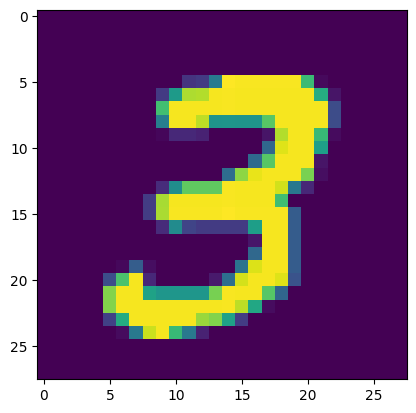

In [111]:
plt.imshow(x.reshape(28, 28))

(6131, 784)
(784,)
(784, 784)


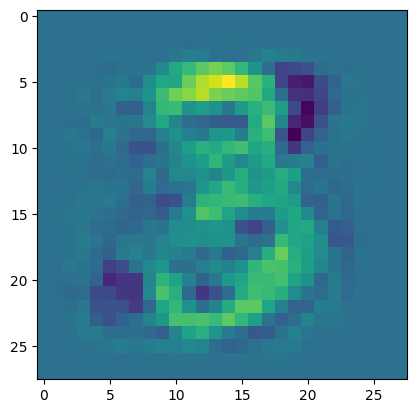

In [112]:
# Statistics
import numpy as np
print(X.shape)
vmu = np.mean(X, axis = 0)
print(vmu.shape)
cov = (X - vmu).T @ (X  -vmu)/ X.shape[0]
print(cov.shape)
# Generate a new sample
z = np.random.multivariate_normal(mean = vmu, cov = cov, size = 1)
plt.imshow(z.reshape(28, 28))



In [113]:
z_ = np.maximum(z, 0)
z_ 

array([[3.68830821e-08, 6.67411302e-06, 6.52481869e-06, 1.23600410e-06,
        6.51161921e-06, 0.00000000e+00, 2.79824739e-06, 5.84810957e-06,
        1.30765531e-06, 0.00000000e+00, 0.00000000e+00, 2.59561746e-06,
        0.00000000e+00, 0.00000000e+00, 1.07088954e-05, 0.00000000e+00,
        4.38839763e-06, 2.84747204e-06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.43733468e-06, 0.00000000e+00,
        6.15429150e-06, 0.00000000e+00, 0.00000000e+00, 1.17966455e-06,
        3.95696193e-06, 1.54631731e-06, 5.69946561e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.21405622e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.25634771e-06,
        3.69553269e-06, 2.15534523e-06, 6.27987590e-06, 0.00000000e+00,
        3.79000316e-06, 5.19083703e-06, 0.00000000e+00, 6.06877560e-06,
        4.87227922e-07, 0.00000000e+00, 5.71769322e-06, 3.92700713e-06,
        1.73395569e-06, 0.00000000e+00, 0.00000000e+00, 0.000000

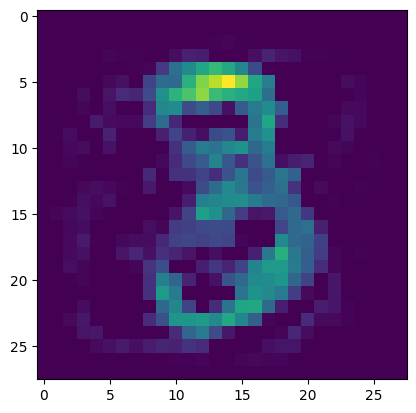

In [114]:
plt.imshow(z_.reshape(28, 28))

In [115]:
vmu

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

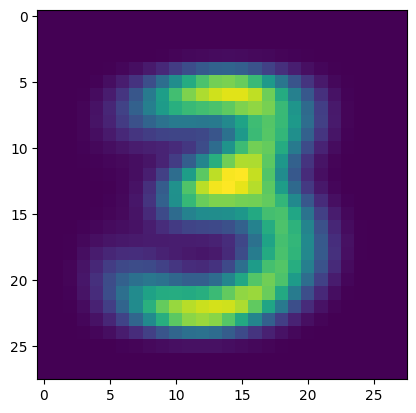

In [116]:
plt.imshow(vmu.reshape(28, 28))

In [117]:
np.trace(cov)

np.float64(2922506.343801777)

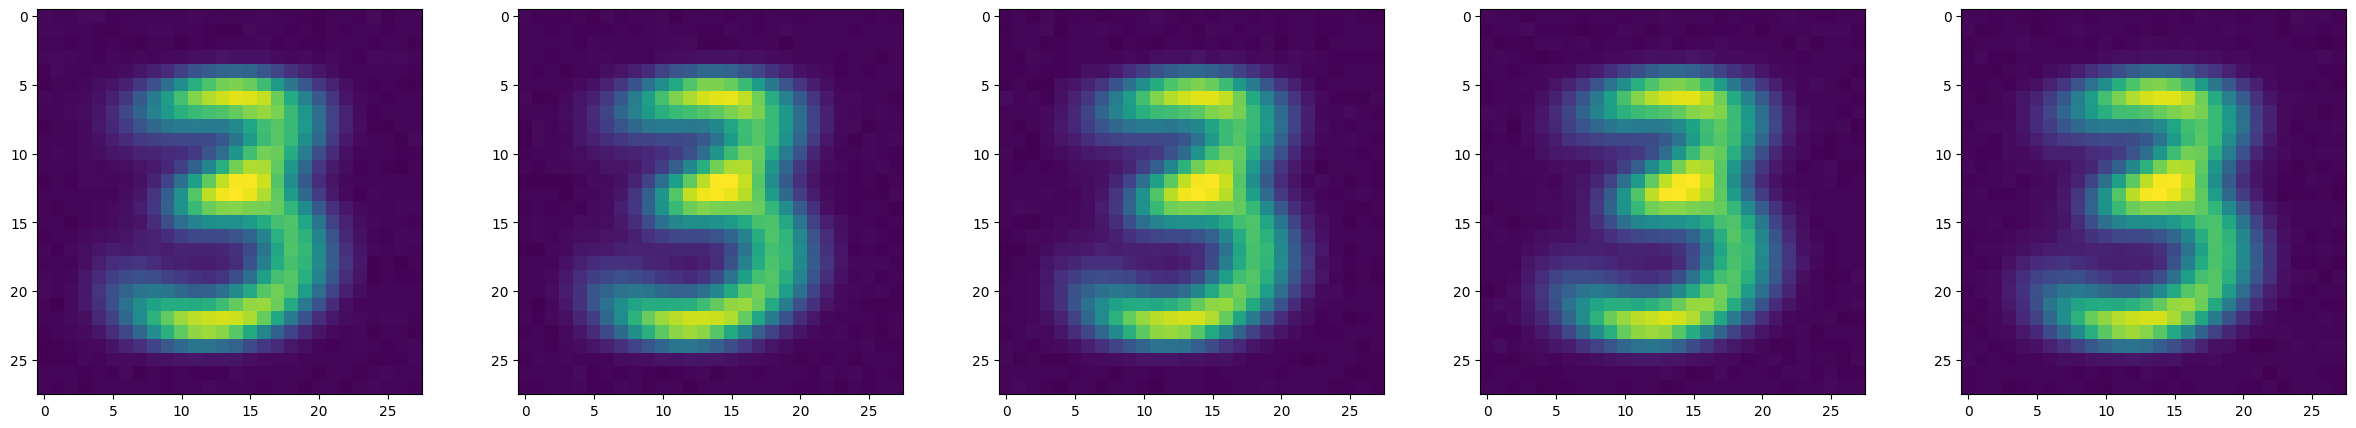

In [118]:
fig, ax = plt.subplots(1, 5, figsize= (30, 5))
for i in range(5):
    np.random.seed(i)
    z = np.random.multivariate_normal(mean = vmu, cov = np.eye(len(vmu)), size = 1)
    #z = np.maximum(z, 0)
    ax[i].imshow(z.reshape(28, 28))


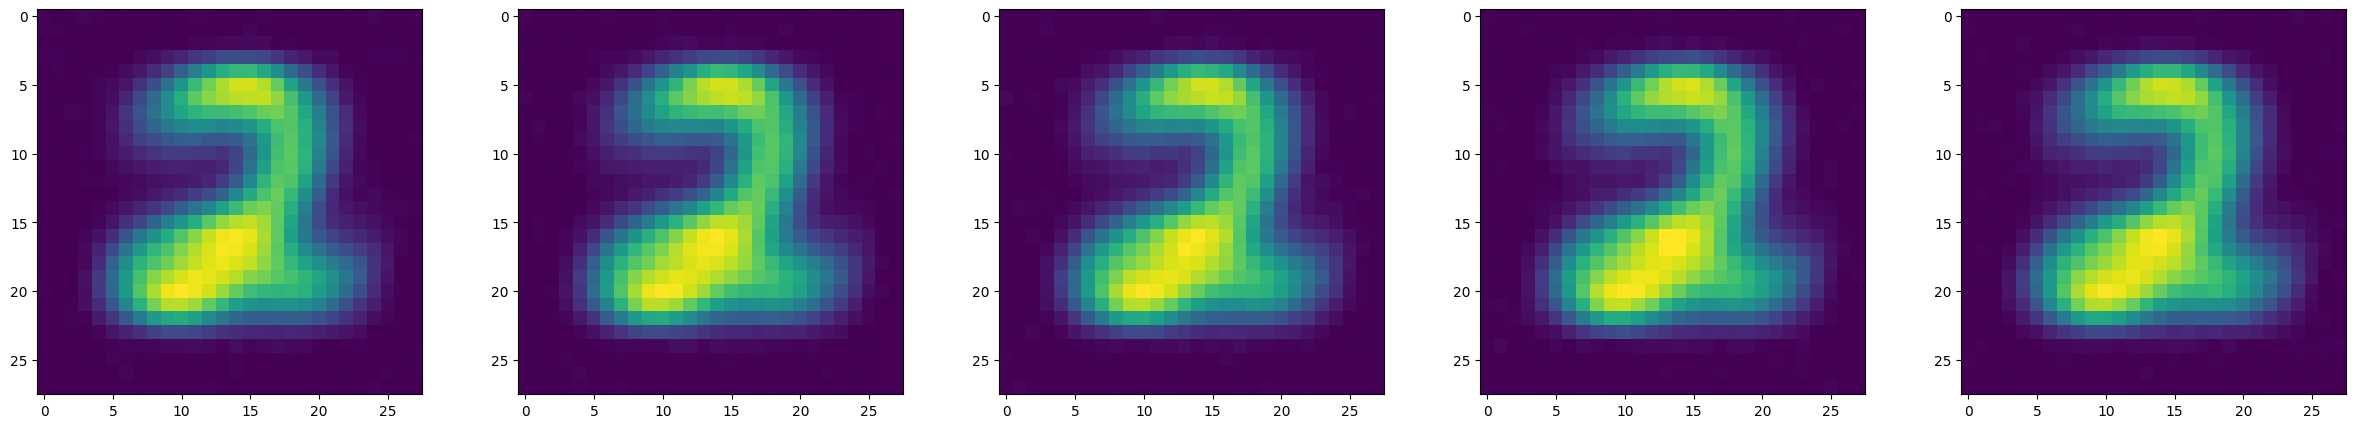

In [87]:
fig, ax = plt.subplots(1, 5, figsize= (30, 5))
for i in range(5):
    np.random.seed(i)
    z = np.random.multivariate_normal(mean = vmu, cov = np.eye(len(vmu)), size = 1)
    z = np.maximum(z, 0)
    ax[i].imshow(z.reshape(28, 28))


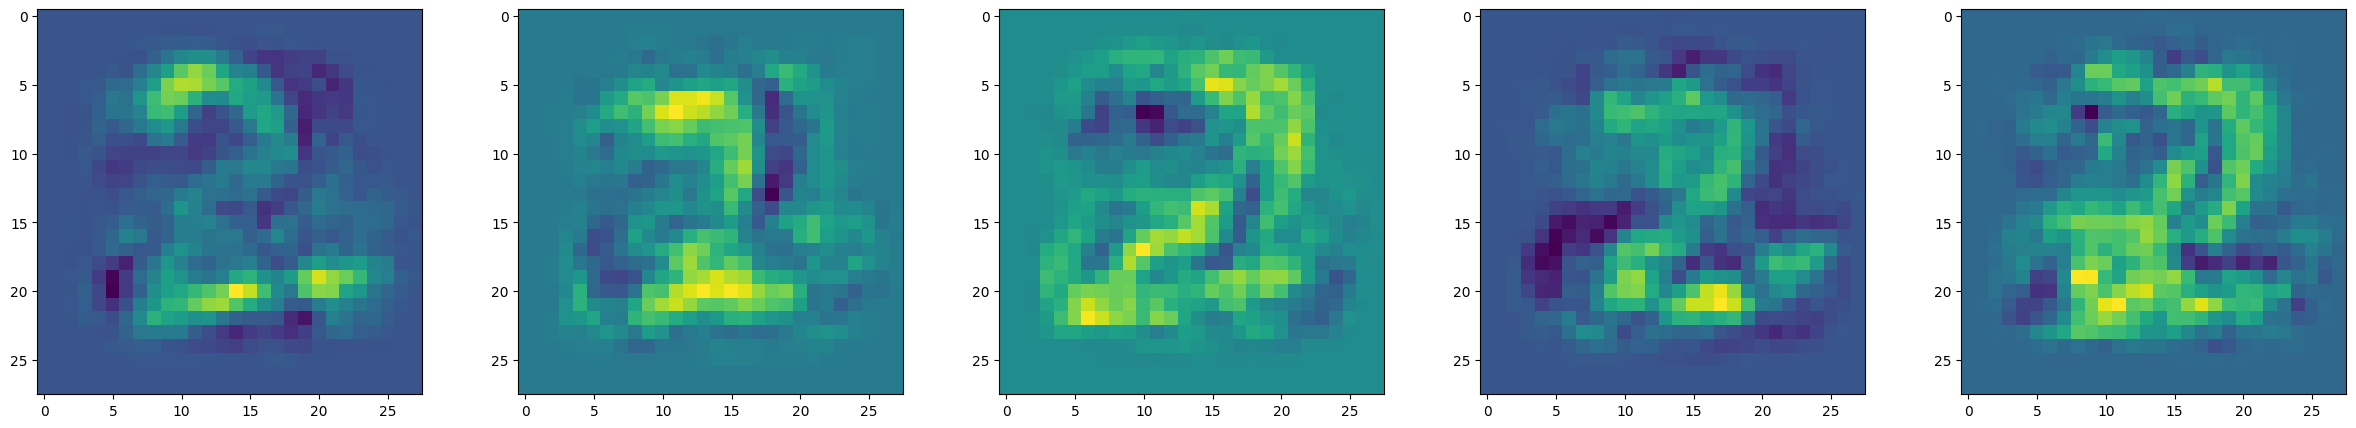

In [83]:
fig, ax = plt.subplots(1, 5, figsize= (30, 5))
for i in range(5):
    np.random.seed(i)
    z = np.random.multivariate_normal(mean = vmu, cov = cov, size = 1)
    #z = np.maximum(z, 0)
    ax[i].imshow(z.reshape(28, 28))


(5958, 784)
(784,)
(784, 784)


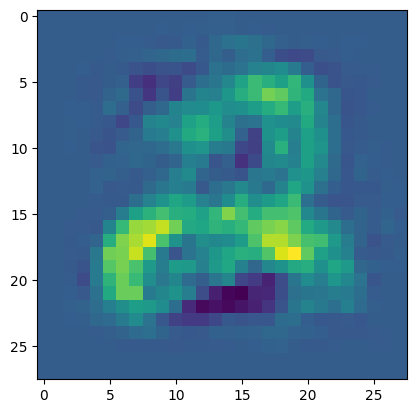

In [68]:
# Statistics
import numpy as np
print(X.shape)
X = X / 255
vmu = np.mean(X, axis = 0)
print(vmu.shape)
cov = (X - vmu).T @ (X  -vmu)/ (X.shape[0] - 1)
print(cov.shape)
# Generate a new sample
z = np.random.multivariate_normal(mean = vmu, cov = cov, size = 1)
plt.imshow(z.reshape(28, 28))



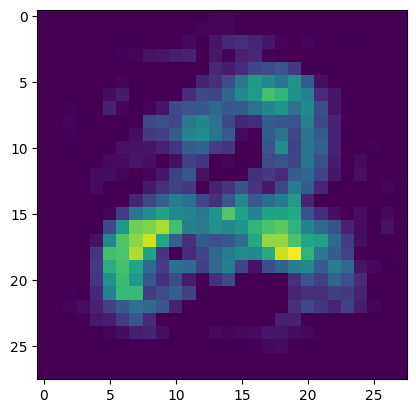

In [69]:
z_ = np.maximum(z, 0)
plt.imshow(z_.reshape(28, 28))

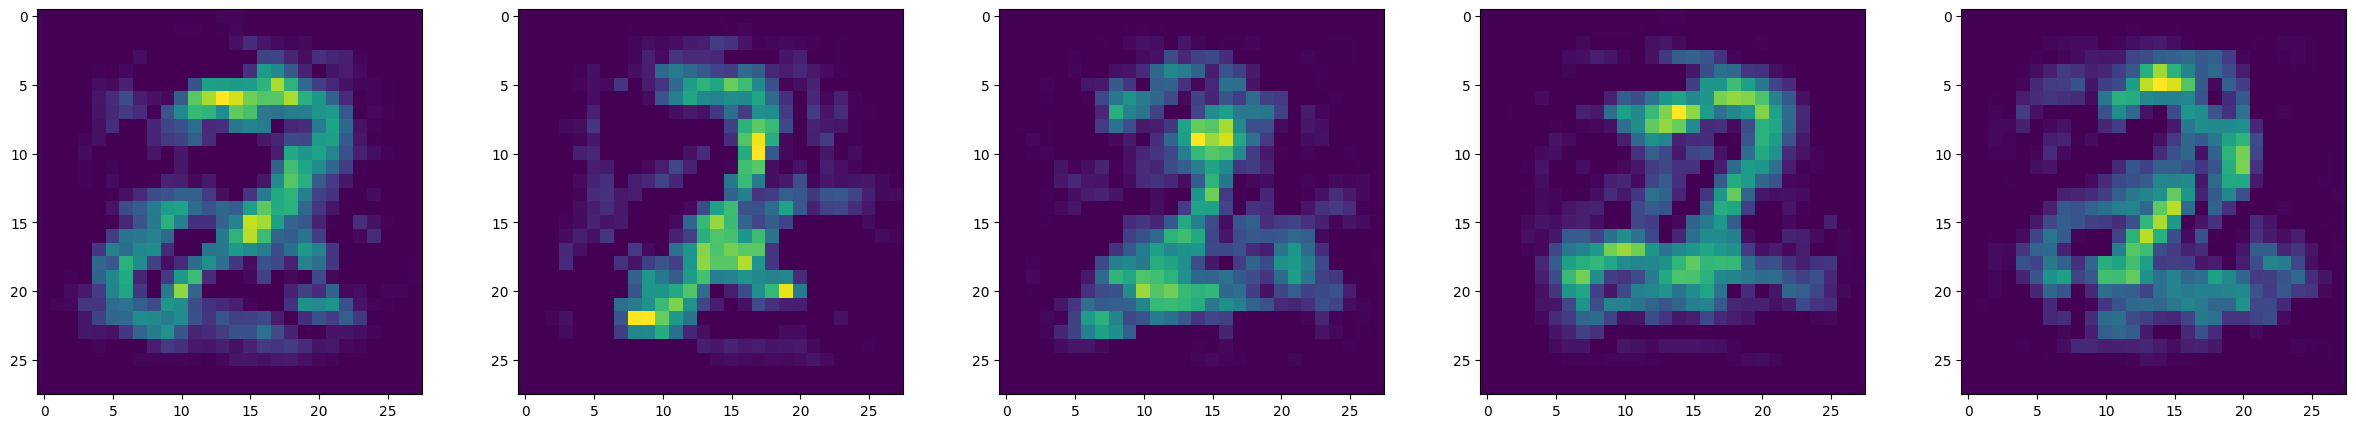

In [93]:
fig, ax = plt.subplots(1, 5, figsize= (30, 5))

for i in range(5):
    #np.random.seed(i)
    z = np.random.multivariate_normal(mean = vmu, cov = cov, size = 1)
    z = np.maximum(z, 0)
    ax[i].imshow(z.reshape(28, 28))


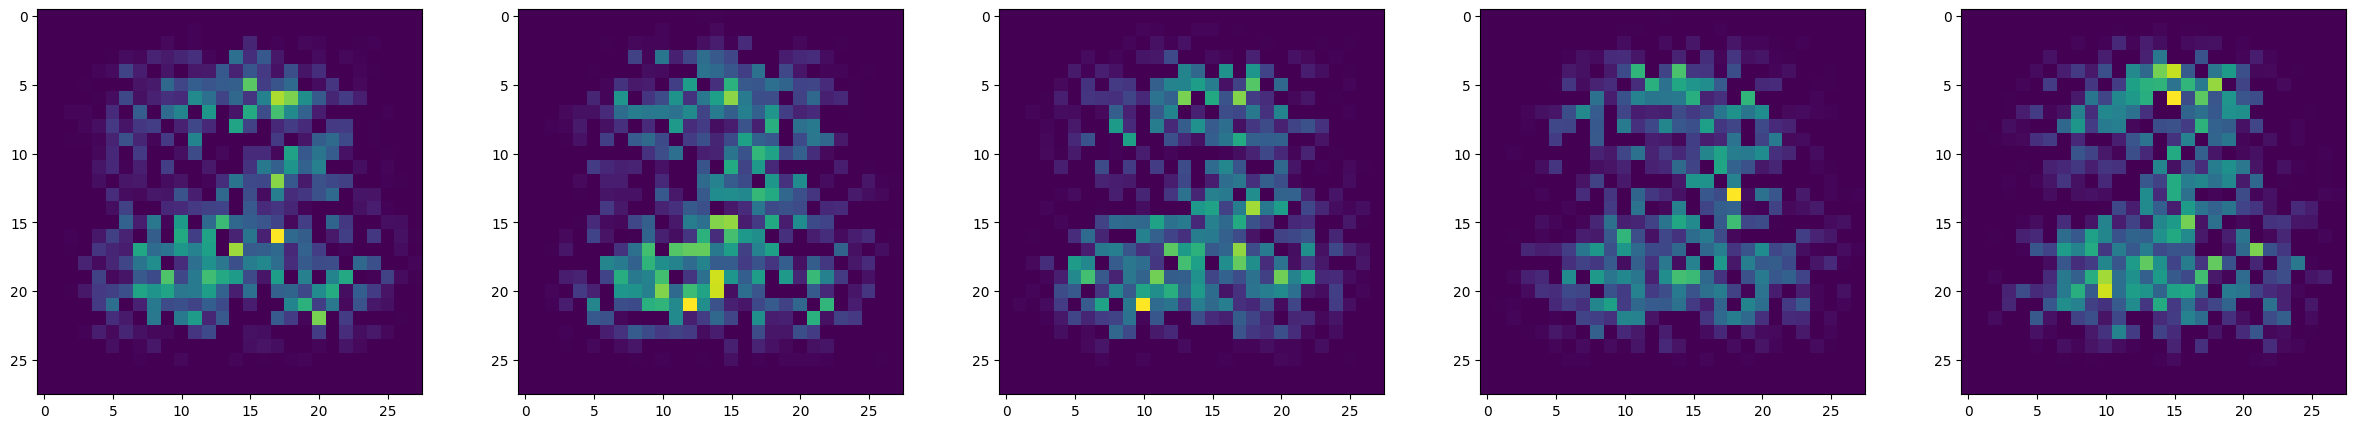

In [95]:
fig, ax = plt.subplots(1, 5, figsize= (30, 5))
cov = (X - vmu).T @ (X - vmu) / (X.shape[0] - 1)
diag = np.diagonal(cov)
cov2 = np.diag(diag)
for i in range(5):
    #np.random.seed(i)
    z = np.random.multivariate_normal(mean = vmu, cov = cov2, size = 1)
    z = np.maximum(z, 0)
    ax[i].imshow(z.reshape(28, 28))


In [103]:
# Increasing the dataset with just the mean, and seeing the covariance estimation improvement
m = 100000
Z = np.random.multivariate_normal(mean = vmu, cov = np.eye(len(vmu)), size = m)
print(Z.shape)
X_inc = np.vstack((X, Z))
print(X_inc.shape)

(100000, 784)
(105958, 784)


(784,)
(784, 784)


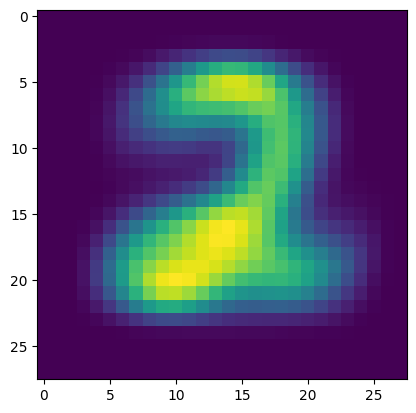

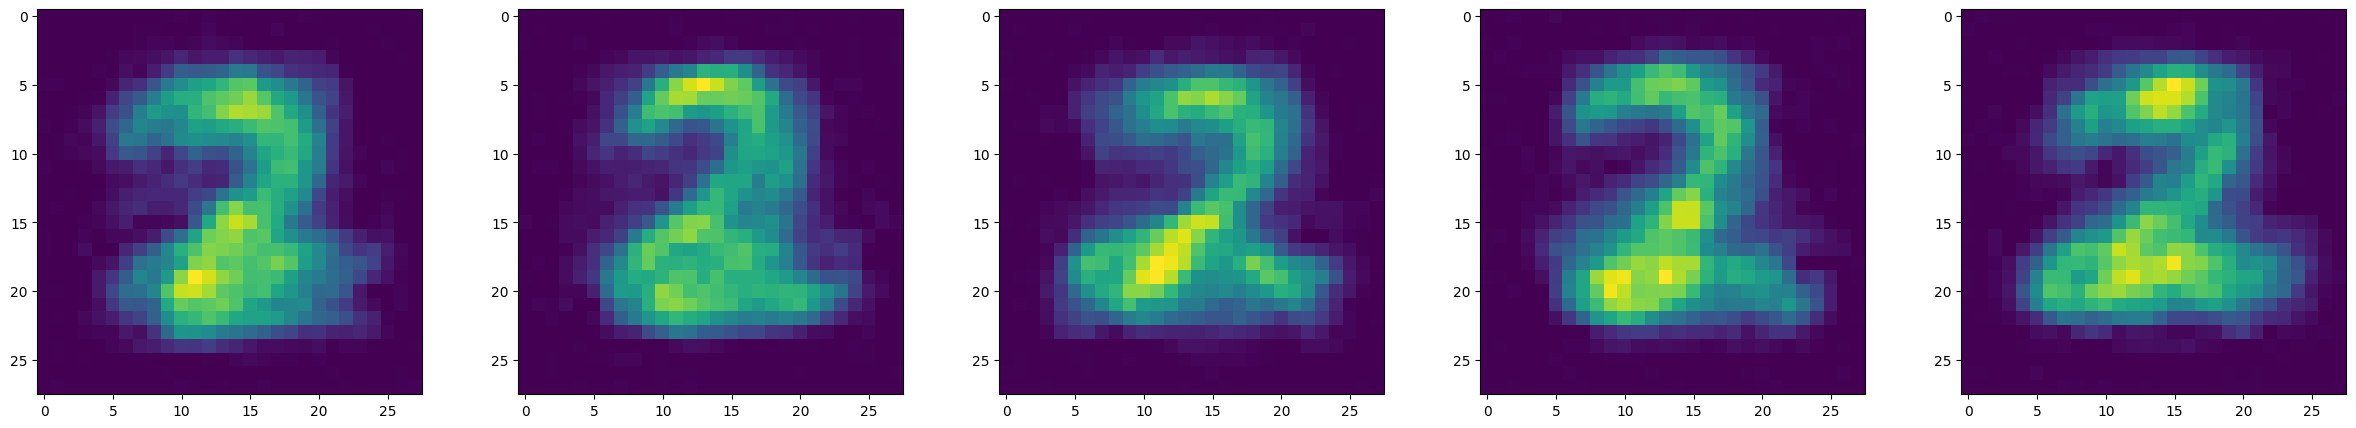

In [104]:
# Statistics
import numpy as np
vmu_inc = np.mean(X_inc, axis = 0)
print(vmu_inc.shape)
cov_inc = (X_inc - vmu_inc).T @ (X_inc  -vmu_inc)/ (X_inc.shape[0] - 1)
print(cov_inc.shape)
plt.imshow(vmu_inc.reshape(28, 28))

# Generate new samples
fig, ax = plt.subplots(1, 5, figsize= (30, 5))

for i in range(5):
    np.random.seed(i)
    z = np.random.multivariate_normal(mean = vmu_inc, cov = cov_inc, size = 1)
    z = np.maximum(z, 0)
    ax[i].imshow(z.reshape(28, 28))




In [119]:
y

array([5, 0, 4, ..., 5, 6, 8])

In [120]:
y_s = [3]*4
y_s = np.array(y_s)
y_s

array([3, 3, 3, 3])

In [121]:
Y = np.hstack((y, y_s))
Y

array([5, 0, 4, ..., 3, 3, 3])

In [1]:
from dataset import *
from torch.utils.data import DataLoader
m = 100
train_data = MNIST_generator(m, device ='cpu', train = True)
train_loader = DataLoader(train_data, batch_size= 32, shuffle = True)


In [2]:
train_iter = iter(train_loader)
batch = next(train_iter)
batch[0].size()

torch.Size([32, 784])

In [3]:
from model import *
model = Mnist_Model()
logits = model(batch[0])
logits.size()

torch.Size([32, 10])

In [4]:
for X, y in train_loader:
    print(X.shape)
    print(y.shape)
    break

torch.Size([32, 784])
torch.Size([32])
